# Example Usage of the M1EPMA Software

- calculation of a forward solution
- calculation of k-ratios (standardized by a constant)
- calculation of the jacobian of these k-ratios w.r.t. the material parameters

In [1]:
import numpy as np
from physics import Copper, Nickel, Chromium, XRay, Material, Detector, ElectronBeam
from scipy.constants import kilo, electron_volt, nano
import matplotlib.pyplot as plt
from experiment import Experiment, k_ratios, mass_fractions_from_parameters, k_ratios_jacobian
import m1model

Definition of the elements and k-ratios / xrays to be considered in the material.

In [2]:
elements = [Copper(), Nickel(), Chromium()]
n_elements = len(elements)
x_rays = [XRay(e, 1.e-12) for e in elements]

Definition of the energy range. ($\epsilon_{initial} > \epsilon_{beam}$, otherwise the beam is not captured)

In [3]:
eps_initial_keV = 17.
eps_cutoff_keV = 10.

Definition of the material domain and grid (reconstruction  pixel, and finite volume cells), the detector (position) and the electron beam (size, position, energy).


In [4]:
m = Material(1, 1, 70, 70, [0., 1000.*nano], [-800.*nano, 0.])
detector = Detector(500.*nano, 50.*nano, m)
e_beam = ElectronBeam([(30.*nano)**2, (30.*nano)**2], [500. * nano, 0. * nano], 16., 0.1)
#plt.plot(np.linspace(0, 1000.*nano), [e_beam.intensity_dist(x, 0.*nano, e_beam.beam_energy_keV) for x in np.linspace(0, 1000.*nano)]) # plots to visualize the beam distribution over the computationl domain
#plt.plot(np.linspace(eps_cutoff_keV, eps_initial_keV), [e_beam.intensity_dist(500.*nano, 0.*nano, e) for e in np.linspace(eps_cutoff_keV, eps_initial_keV)])


Definition of the Experiment (a specific electron beam / detector setup)

In [5]:
e = Experiment(m, detector, e_beam, elements, x_rays, eps_initial_keV, eps_cutoff_keV, 100)

Definition of the parameter vector (the shape of the vector is given by the material definition).
Mass fractions can be calculated from the parameters.

In [6]:
params = np.full(e.parameter_dimensions, 0.33)
mass_fractions = mass_fractions_from_parameters(m.n_x, m.n_y, params)

Solving the m1model and displaying a snapshot of it.

In [7]:
sol = m1model.solve_forward(e, mass_fractions)

calculating forward solution


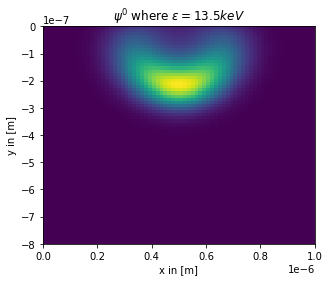

In [8]:
energy_step=50
plt.imshow(sol['solution'][energy_step][0, :, :].T, origin="lower", extent=(m.dim_x[0], m.dim_x[1], m.dim_y[0], m.dim_y[1]));
plt.xlabel("x in [m]");
plt.ylabel("y in [m]");
plt.title("$\psi^0$ where $\epsilon = {:.1f}keV$".format(e.epsilons_keV[energy_step]));

Calculation of k_ratios (internally solves the m1model again). Note that the k-ratios are not standardized (only a constant factor is used).

In [9]:
k = k_ratios(e, params)
k

calculating forward solution


DeviceArray([0.36621377, 0.47702644, 0.93333039], dtype=float64)

Calculation of the k-ratios and their jacobian w.r.t. the material parameters. (This might take a while, because jax compiles the derivative functions)
The adjoint solution is calculated 3 times, once for each k-ratio (output).

In [10]:
k, jac = k_ratios_jacobian(e, params)
jac

solving forward
calculating forward solution
extraction operator
extraction opertator jacobian
calculating
solving adjoint
calculating adjoint solution
scalar product jacobian
adding to jacobian
solving adjoint
calculating adjoint solution
scalar product jacobian
adding to jacobian
solving adjoint
calculating adjoint solution
scalar product jacobian
adding to jacobian


DeviceArray([[[[ 1.13907627,  0.01088031]]],


             [[[ 0.04228116,  1.46389582]]],


             [[[-2.70486691, -2.75114424]]]], dtype=float64)

In [11]:
k

DeviceArray([0.36621377, 0.47702644, 0.93333039], dtype=float64)